# Compte rendu : Mini Projet

## Partie théorique

### Méthode de Réctangle:

#### Cette méthode, très élémentaire, basée sur les sommes de Cauchy-Riemann (approchant l'aire sous une courbe) et appliquée à une fonction f continue, permet le calcul approché d'intégrales en choisissant une subdivision régulière de pas         xi+1 - xi = (b - a)/n, donc indépendant de i avec une valeur de n "suffisamment grande".
#### On obtient une succession de rectangles en rose ci-contre, d'où le nom de cette méthode, approchant l'aire sous la courbe,  où ci est choisi ici au "milieu" de [xi ; xi+1]. On calcule :

#### Sn = h × Σf(ci) , i variant de 0 à n - 1

#### avec : h = (b - a)/n , xi = a + i.h , ci = (xi+1 + xi)/2 = a + ih + h/2. Le passage à la limite fournit l'intégrale cherchée

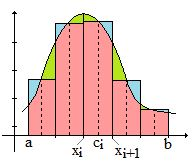

### Méthode des trapèzes:

#### En analyse numérique, la méthode des trapèzes est une méthode pour le calcul numérique d'une intégrale 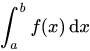 s'appuyant sur l'interpolation linéaire par intervalles.

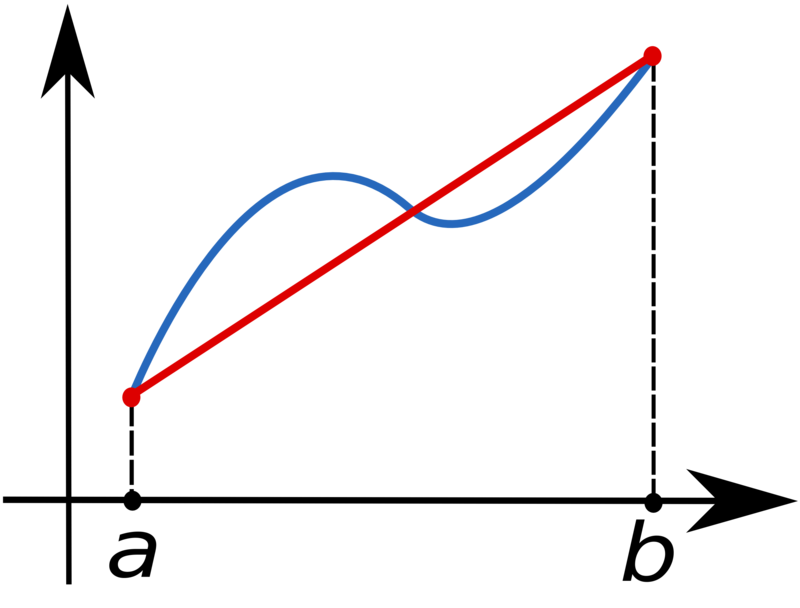

#### Le principe est d'assimiler la région sous la courbe représentative d'une fonction f définie sur un segment [a , b] à un trapèze et d'en calculer l'aire T :
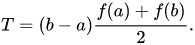

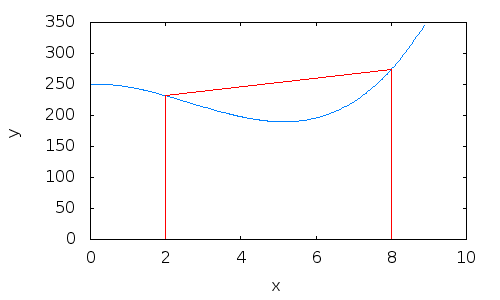

### Méthode de simpson:

#### En analyse numérique, la méthode de Simpson, du nom de Thomas Simpson, est une technique de calcul numérique d'une intégrale, c'est-à-dire, le calcul approché de:
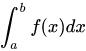

#### Cette méthode utilise l'approximation d'ordre 2 de f par un polynôme quadratique P prenant les mêmes valeurs que f aux points d'abscisse a, b et m = (a + b)⁄2. Pour déterminer l'expression de cette parabole (polynôme de degré 2), on utilise l'interpolation lagrangienne. Le résultat peut être mis sous la forme :
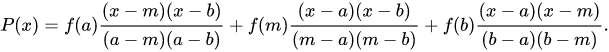


#### Un polynôme étant une fonction très facile à intégrer, on approche l'intégrale de la fonction f sur l'intervalle [a, b], par l'intégrale de P sur ce même intervalle. On a ainsi, la simple formule :
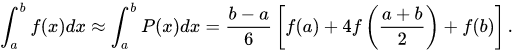

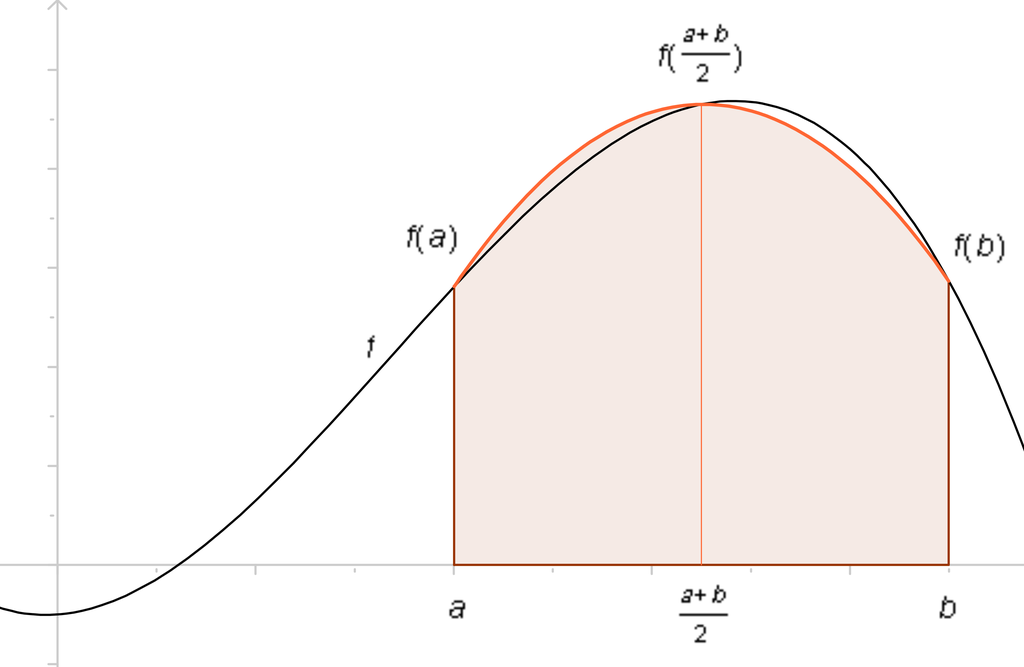

### Méthode des points milieux

#### En analyse numérique, la méthode du point médian est une méthode permettant de réaliser le calcul numérique d'une intégrale 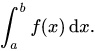


#### Le principe est d'approcher l'intégrale de la fonction f par l'aire d'un rectangle de base le segment [a,b] et de hauteur  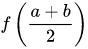

####  ce qui donne : 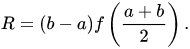

#### Cette aire est aussi celle du trapèze de base [a,b] et dont le côté opposé est tangent au graphe de f en 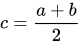  ce qui explique sa relative bonne précision.

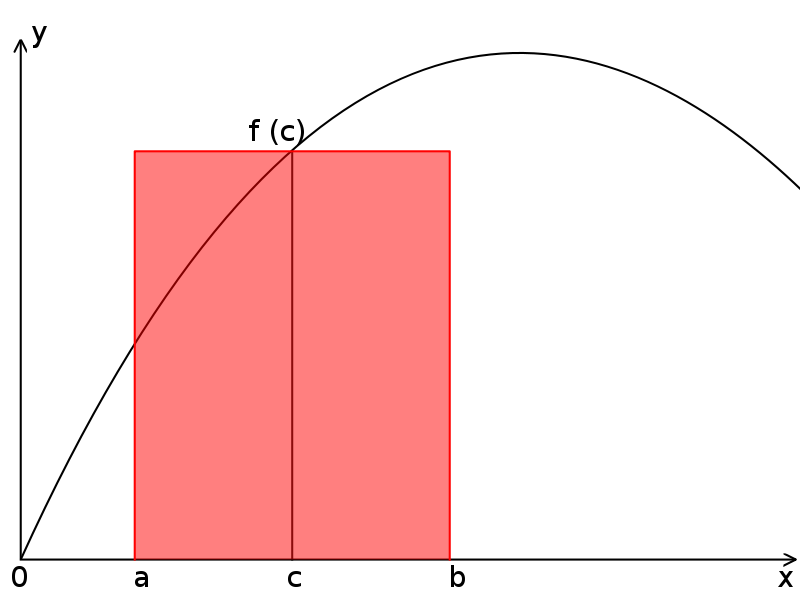

## Partie Pratique:

In [43]:
conda install -c conda-forge ipympl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [44]:
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [45]:
f=lambda x:1/(1+x**2)

In [46]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine,color=c )
        plt.plot(xl, yl,"bo")
        plt.xlabel (lx)
        plt.ylabel (ly)
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
    

In [47]:
#interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

In [48]:
class Trapezoidal(object):
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,color=c)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.xlabel(lx)
        plt.ylabel (ly)
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [49]:
class Simpson(object):
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
    def integrate(self,f):
        if self.n % 2 != 0 :
            return "saisir un nombre pair"
        else :
            h=(self.b-self.a)/float(self.n)
            sum1=(f(self.a)+f(self.b))/6.0
            for i in range(1,self.n) :
                sum1 += f(self.a+i*h)/3.0
            for i in range(self.n) :
                sum1 += f(self.a+(2*i+1)*h/2.0)*2.0/3.0
        I = h*sum1
        return I

    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0 , yl[i], yl[i+1] , 0 , 0 ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m",color=c)
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.xlabel(lx)
        plt.ylabel (ly)
        plt.title ( ' Methode de Simpson' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [50]:
class Milieux( object ) :
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly

    def integrate(self,f):
        h=float(self.b-self.a)/(self.n)
        sum1=0
        for i in range(self.n):
            sum1 += f(self.a+(i+1/2)*h)

        I = h*sum1
        return I

    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0 , yl[i], yl[i+1] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine,color=c )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( lx )
        plt.ylabel ( ly )
        plt.title ( ' Methode de Milieux' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [51]:
def sim(a,b,n,f,i,x,y):
    R=RectangleG(a,b,n,f,i,x,y)
    T=Trapezoidal(a,b,n,f,i,x,y)
    M=Milieux(a,b,n,f,i,x,y)
    S=Simpson(a,b,n,f,i,x,y)

    plt.subplot(221)  
    R.Graph(f,i,x,y)
    plt.subplot(222)
    T.Graph(f,i,x,y)
    plt.subplot(223)
    M.Graph(f,i,x,y)
    plt.subplot(224)
    
    if n%2==0:
        S.Graph(f,i,x,y)
    else :
        plt.text( 0.5*(a+b) , f(b) , ' N={}\n est impaire'.format(n) , fontsize =15 )
       
    plt.show()

In [52]:
#interact(simul,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

In [53]:
output = widgets.Output() 
with output:
    fig= plt.figure(figsize=(12,10))

fig.canvas.toolbar_position = 'bottom' 

In [54]:
# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='N')
color_picker = widgets.ColorPicker(value="blue", description='pick a color')
text_a= widgets.IntText(value=-1, description='Donner A', continuous_update=False)
text_b = widgets.IntText(value=1, description='Donner B', continuous_update=False)
select = widgets.Dropdown(options={'1/(1+x**2)':lambda x:1/(1+x**2),
                                    'sin(x)':lambda x: sin(x),
                                    'cos(x)':lambda x:cos(x),
                                    'x**2-x+5':lambda x:x**2-x+5},description='Choisir une fonction') 
text_xlabel = widgets.Text(value='x', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='f(x)', description='ylabel', continuous_update=False)
button = widgets.Button(description="Afficher")

# callback functions
def update(change):
    """redraw line (update plot)"""
    fig.clear() 
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)
   
def line_color(change):
    """set line color"""
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)
    
def update_xlabel(change):
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,change.new,text_ylabel.value)
def update_ylabel(change):
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,change.new)
def on_button_clicked(b):
    with output:
        fig.clear()
        sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)

int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')

In [55]:
controls = widgets.VBox([int_slider, color_picker,text_a, text_b,select,text_xlabel, text_ylabel,button])
button.on_click(on_button_clicked)
widgets.HBox([controls, output])

In [56]:
#sim(text_a.value,text_b.value,int_slider.value,f)